2 class dataset- https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip


3 class - 2 class dataset + sample of IMFD

In [ ]:
#!gdown --id '1gjltyD_MnNWcnd56NnjUOizdi39CUEPF'   #IMFD dataset google drive link
'''Downloading...
From: https://drive.google.com/uc?id=1gjltyD_MnNWcnd56NnjUOizdi39CUEPF
To: /content/IMFD.zip
10.3GB [02:47, 61.4MB/s]'''

Downloading...
From: https://drive.google.com/uc?id=1gjltyD_MnNWcnd56NnjUOizdi39CUEPF
To: /content/IMFD.zip
10.3GB [02:47, 61.4MB/s]


In [ ]:
#!unzip /content/IMFD.zip
'''
Streaming output truncated to the last 5000 lines.
  inflating: 29000/29811_Mask_Mouth_Chin.jpg  
  inflating: 29000/29812_Mask_Mouth_Chin.jpg  
  inflating: 29000/29813_Mask_Mouth_Chin.jpg  
  inflating: 29000/29814_Mask_Mouth_Chin.jpg  
  inflating: 29000/29815_Mask_Chin.jpg  
  inflating: 29000/29816_Mask_Mouth_Chin.jpg  
  inflating: 29000/29817_Mask_Mouth_Chin.jpg  
  inflating: 29000/29818_Mask_Mouth_Chin.jpg  
 extracting: 29000/29819_Mask_Mouth_Chin.jpg  
  inflating: 29000/29820_Mask_Mouth_Chin.jpg  
  inflating: 29000/29821_Mask_Mouth_Chin.jpg  
  inflating: 29000/29822_Mask_Mouth_Chin.jpg  
  inflating: 29000/29823_Mask_Mouth_Chin.jpg  '''

In [ ]:
#!zip -r /content/gdrive/MyDrive/basepaper_project/dataset_3parts/improperlymasked.zip /content/25000
''' adding: content/25000/ (stored 0%)
  adding: content/25000/25609_Mask_Mouth_Chin.jpg (deflated 0%)
  adding: content/25000/25093_Mask_Mouth_Chin.jpg (deflated 0%)
  adding: content/25000/25633_Mask_Mouth_Chin.jpg (deflated 0%)
  adding: content/25000/25864_Mask_Mouth_Chin.jpg (deflated 0%)
'''

In [ ]:
#!zip -r /content/gdrive/MyDrive/basepaper_project/dataset_3parts/improperlymasked7000.zip /content/07000

In [ ]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print('found gpu at {}'.format(device_name))

found gpu at /device:GPU:0


In [ ]:
#!pip install tf-nightly
#with tf.device('/gpu:0'):

# Start here

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive"
#%cd /content/gdrive/My Drive/Colab Notebooks/   #bring stuff to this kinda folder
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
%cd basepaper_project/

[Errno 2] No such file or directory: 'basepaper_project/'
/content/gdrive/My Drive/basepaper_project


In [ ]:
!ls dataset/without_mask | wc -l

5229


In [ ]:
import os
CWD_PATH = os.getcwd()
print(CWD_PATH)

/content/gdrive/My Drive/basepaper_project


In [ ]:
#train_mask_detector.py

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
import random

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
n = 500

In [ ]:
#  TO LOAD AND PREPROCESS TRAINING DATASET
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
#??? args = {"dataset" : 'basepaper_project/dataset/'}
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths1 = list(paths.list_images('dataset_3parts/with_mask'))
imagePaths = random.sample(imagePaths1, n)
imagePaths2 = list(paths.list_images('dataset_3parts/without_mask'))
imagePathswo = random.sample(imagePaths2, n)
imagePaths3 = list(paths.list_images('dataset_3parts/improperly_masked'))
imagePathsim = random.sample(imagePaths3, n)
imagePaths.extend(imagePathswo)
imagePaths.extend(imagePathsim)
print(len(imagePaths))

[INFO] loading images...
1500


In [ ]:
print(imagePaths)

['dataset_3parts/with_mask/464.jpg', 'dataset_3parts/with_mask/381.jpg', 'dataset_3parts/with_mask/92.jpg', 'dataset_3parts/with_mask/315.jpg', 'dataset_3parts/with_mask/122.jpg', 'dataset_3parts/with_mask/225.jpg', 'dataset_3parts/with_mask/181.jpg', 'dataset_3parts/with_mask/126.jpg', 'dataset_3parts/with_mask/269.jpg', 'dataset_3parts/with_mask/35.jpg', 'dataset_3parts/with_mask/123.jpg', 'dataset_3parts/with_mask/382.jpg', 'dataset_3parts/with_mask/310.jpg', 'dataset_3parts/with_mask/230.jpg', 'dataset_3parts/with_mask/280.jpg', 'dataset_3parts/with_mask/358.jpg', 'dataset_3parts/with_mask/645.jpg', 'dataset_3parts/with_mask/655.jpg', 'dataset_3parts/with_mask/295.jpg', 'dataset_3parts/with_mask/199.jpg', 'dataset_3parts/with_mask/443.jpg', 'dataset_3parts/with_mask/36.jpg', 'dataset_3parts/with_mask/438.jpg', 'dataset_3parts/with_mask/144.jpg', 'dataset_3parts/with_mask/363.jpg', 'dataset_3parts/with_mask/77.jpg', 'dataset_3parts/with_mask/647.jpg', 'dataset_3parts/with_mask/652.j

In [ ]:
data_initial = []
labels_initial = []
# loop over the image paths
for i,imagePath in enumerate(imagePaths):
	# extract the class label from the filename
  if i % 200 ==0:
    print(i)
  label = imagePath.split(os.path.sep)[-2]
  # load the input image (224x224) and preprocess it
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  # update the data and labels lists, respectively
  data_initial.append(image)
  labels_initial.append(label)
# convert the data and labels to NumPy arrays

0
200
400
600
800
1000
1200
1400


In [ ]:
data = np.asarray(data_initial, dtype="float32")
labels = np.asarray(labels_initial)

In [ ]:
labels = np.array(labels_initial)
labels.reshape(-1,1)
labels.shape

(1500,)

In [ ]:
print(len(data))

1500


In [ ]:
'''from numpy import save
save('data.npy', data)
save('labels.npy', labels)'''

In [ ]:
'''from numpy import savetxt
savetxt('data3.csv', data, delimiter=',')
savetxt('labels3.csv', labels, delimiter=',')
#from numpy import loadtxt or load
#data = loadtxt('data.csv', delimiter=',')
from numpy import save
save('data3.npy', data)
save('labels3.npy', labels)
#data = load('data.npy')'''

In [ ]:
from numpy import savez_compressed
savez_compressed('data3.npz', data)   #in drive
savez_compressed('labels3.npz', labels)
#dict_data = load('data.npz')

In [ ]:
print(np.unique(labels))

['improperly_masked' 'with_mask' 'without_mask']


In [ ]:
n_labels = len(np.unique(labels))
print(n_labels)

3


In [ ]:
# perform one-hot encoding on the labels 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels1 = to_categorical(labels) - makes it 3dim

In [ ]:
target_names=lb.classes_.reshape(-1,1)
print(target_names.shape)
#n_labels = len(lb.classes_) or labels.shape[1]

(3, 1)


In [ ]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
labels.shape

(1500, 3)

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
testY[:3]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(n_labels, activation="softmax")(headModel)         #n_labels = len(np.unique(labels)) = 3 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
37/37 [==============================] - 68s 2s/step - loss: 1.3293 - accuracy: 0.3825 - val_loss: 0.4614 - val_accuracy: 0.8967
Epoch 2/20
37/37 [==============================] - 62s 2s/step - loss: 0.5213 - accuracy: 0.8065 - val_loss: 0.2658 - val_accuracy: 0.9300
Epoch 3/20
37/37 [==============================] - 62s 2s/step - loss: 0.3191 - accuracy: 0.8859 - val_loss: 0.1875 - val_accuracy: 0.9467
Epoch 4/20
37/37 [==============================] - 62s 2s/step - loss: 0.2425 - accuracy: 0.9183 - val_loss: 0.1452 - val_accuracy: 0.9533
Epoch 5/20
37/37 [==============================] - 62s 2s/step - loss: 0.1677 - accuracy: 0.9486 - val_loss: 0.1210 - val_accuracy: 0.9633
Epoch 6/20
37/37 [==============================] - 62s 2s/step - loss: 0.1535 - accuracy: 0.9470 - val_loss: 0.1049 - val_accuracy: 0.9700
Epoch 7/20
37/37 [==============================] - 62s 2s/step - loss: 0.1266 - accuracy: 0.9599 - val_loss: 

In [ ]:
target_names=lb.classes_.reshape((3,1))
print(target_names.shape)

(3, 1)


In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('mask_detector_3class', save_format="h5")
# if any error, just run the lb code block again ----------------------------------

[INFO] evaluating network...
                   precision    recall  f1-score   support

improperly_masked       0.95      0.99      0.97       100
        with_mask       0.99      0.95      0.97       100
     without_mask       1.00      1.00      1.00       100

         accuracy                           0.98       300
        macro avg       0.98      0.98      0.98       300
     weighted avg       0.98      0.98      0.98       300

[INFO] saving mask detector model...


In [ ]:
# Import confusion_matrix to construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
# Construct the Confusion Matrix using Predicted Target and Actual Test data Target
lab=[0,1,2]
cm = confusion_matrix(testY.argmax(axis=1), predIdxs, lab)
print(cm)

[[ 99   1   0]
 [  5  95   0]
 [  0   0 100]]


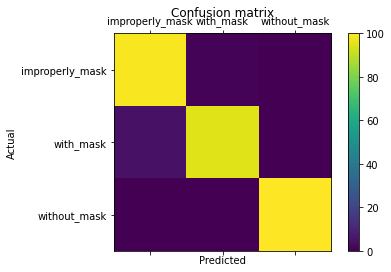

In [ ]:
# Show confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
lab=['improperly_mask','with_mask','without_mask']
ax.set_xticklabels([''] + lab)
ax.set_yticklabels([''] + lab)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

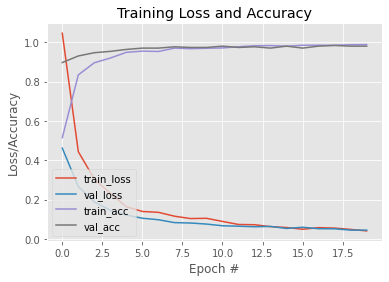

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('plot_3class.png')


### Detect Mask Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive"
#%cd /content/gdrive/My Drive/Colab Notebooks/   #bring stuff to this kinda folder
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
%cd basepaper_project/

/content/gdrive/My Drive/basepaper_project


In [ ]:
import os
CWD_PATH = os.getcwd()
print(CWD_PATH)

/content/gdrive/My Drive/basepaper_project


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print("[INFO] loading face detector model...")
#SSD model
prototxtPath = os.path.sep.join(['face_detector','deploy.prototxt.txt'])
weightsPath = os.path.sep.join(['face_detector/','res10_300x300_ssd_iter_140000.caffemodel'])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...


In [ ]:
CWD_PATH = os.getcwd()
print(CWD_PATH)

/content/gdrive/My Drive/basepaper_project


In [ ]:
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
#model = load_model(args["model"])
model = load_model('mask_detector_3class')

[INFO] loading face mask detector model...


In [ ]:
#args={"confidence":0.5, "image_path_cam":'examples/example0.jpg'} 
args={"confidence":0.6} # to filter weak detections

In [ ]:
#print(args["image_path_cam"])

In [ ]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
#image = cv2.imread(args["image"])
#image = cv2.imread(args["image_path_cam"])
image = cv2.imread('examples3/example102.jpg')           #__________change image here
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


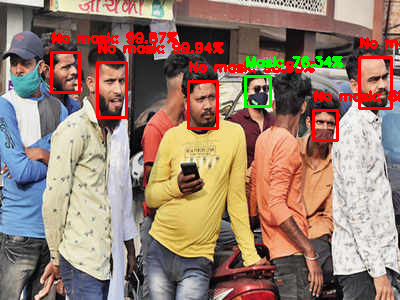

-1

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with	the detection
  confidence = detections[0, 0, i, 2]
  # filter out weak detections by ensuring the confidence is
  # greater than the minimum confidence
  if confidence > args["confidence"]:
    # compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # ensure the bounding boxes fall within the dimensions of
    # the frame
    (startX, startY) = (max(0, startX), max(0, startY))
    (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
    
    # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    # pass the face through the model to determine if the face
    # has a mask or not
    (improperly_masked, mask, withoutMask) = model.predict(face)[0]
    # determine the class label and color we'll use to draw
    # the bounding box and text
    
    #label = "Mask" if mask > withoutMask else "No Mask"
    if mask > withoutMask and mask > improperly_masked:
      label = "Mask"
    elif withoutMask > mask and withoutMask > improperly_masked :
      label = "No mask"
    else:
      label = "Improper mask"

    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    # include the probability in the label
    label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
    
    # display the label and bounding box rectangle on the output
    # frame
    cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
#image = cv2.imread(args["image"])
#image = cv2.imread(args["image_path_cam"])
image = cv2.imread('examples3/example2.jpg')           #__________change image here
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


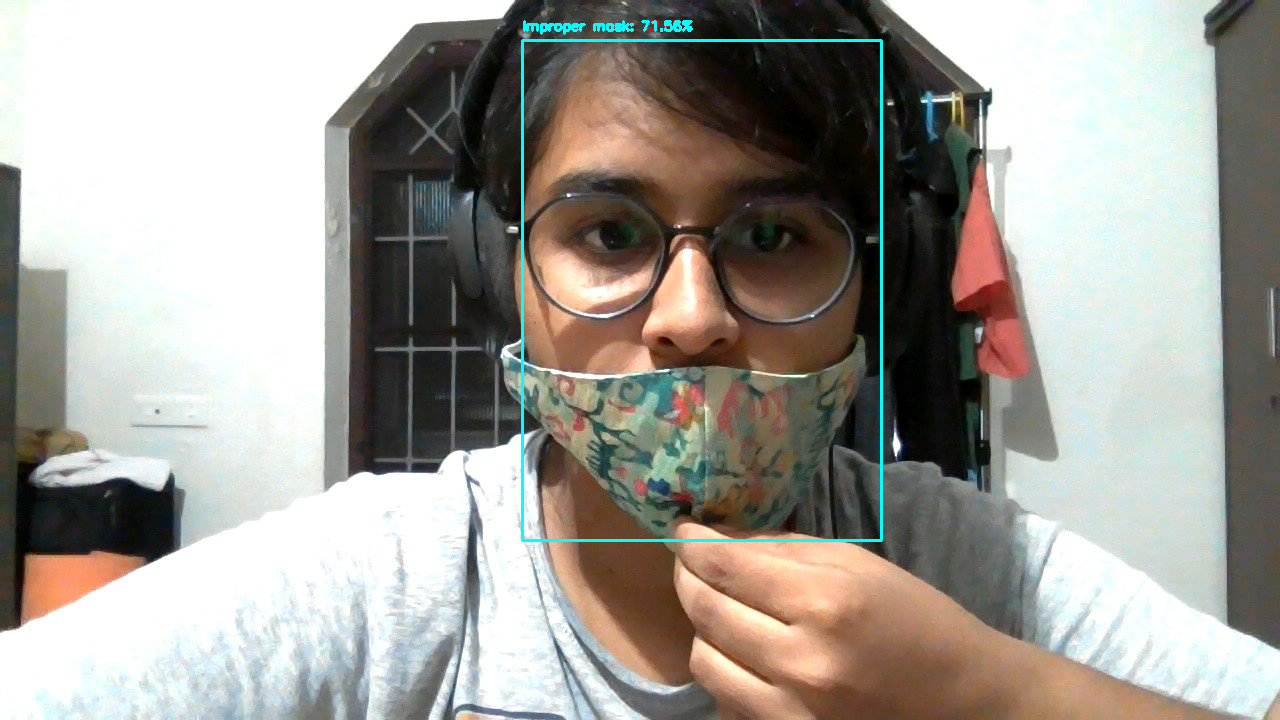

-1

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with	the detection
  confidence = detections[0, 0, i, 2]
  # filter out weak detections by ensuring the confidence is
  # greater than the minimum confidence
  if confidence > args["confidence"]:
    # compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # ensure the bounding boxes fall within the dimensions of
    # the frame
    (startX, startY) = (max(0, startX), max(0, startY))
    (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
    
    # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    # pass the face through the model to determine if the face
    # has a mask or not
    (improperly_masked, mask, withoutMask) = model.predict(face)[0]
    # determine the class label and color we'll use to draw
    # the bounding box and text
    
    #label = "Mask" if mask > withoutMask else "No Mask"
    if mask > withoutMask and mask > improperly_masked:
      label = "Mask"
      color = (0, 255, 0)
    elif withoutMask > mask and withoutMask > improperly_masked :
      label = "No mask"
      color = (0, 0, 255)
    else:
      label = "Improper mask"
      color = (255, 255, 0)

    #color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    # include the probability in the label
    label = "{}: {:.2f}%".format(label, max(improperly_masked,mask, withoutMask) * 100)
    
    # display the label and bounding box rectangle on the output
    # frame
    cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
#image = cv2.imread(args["image"])
#image = cv2.imread(args["image_path_cam"])
image = cv2.imread('examples3/example3.jpg')           #__________change image here
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


In [ ]:
#print(detections)

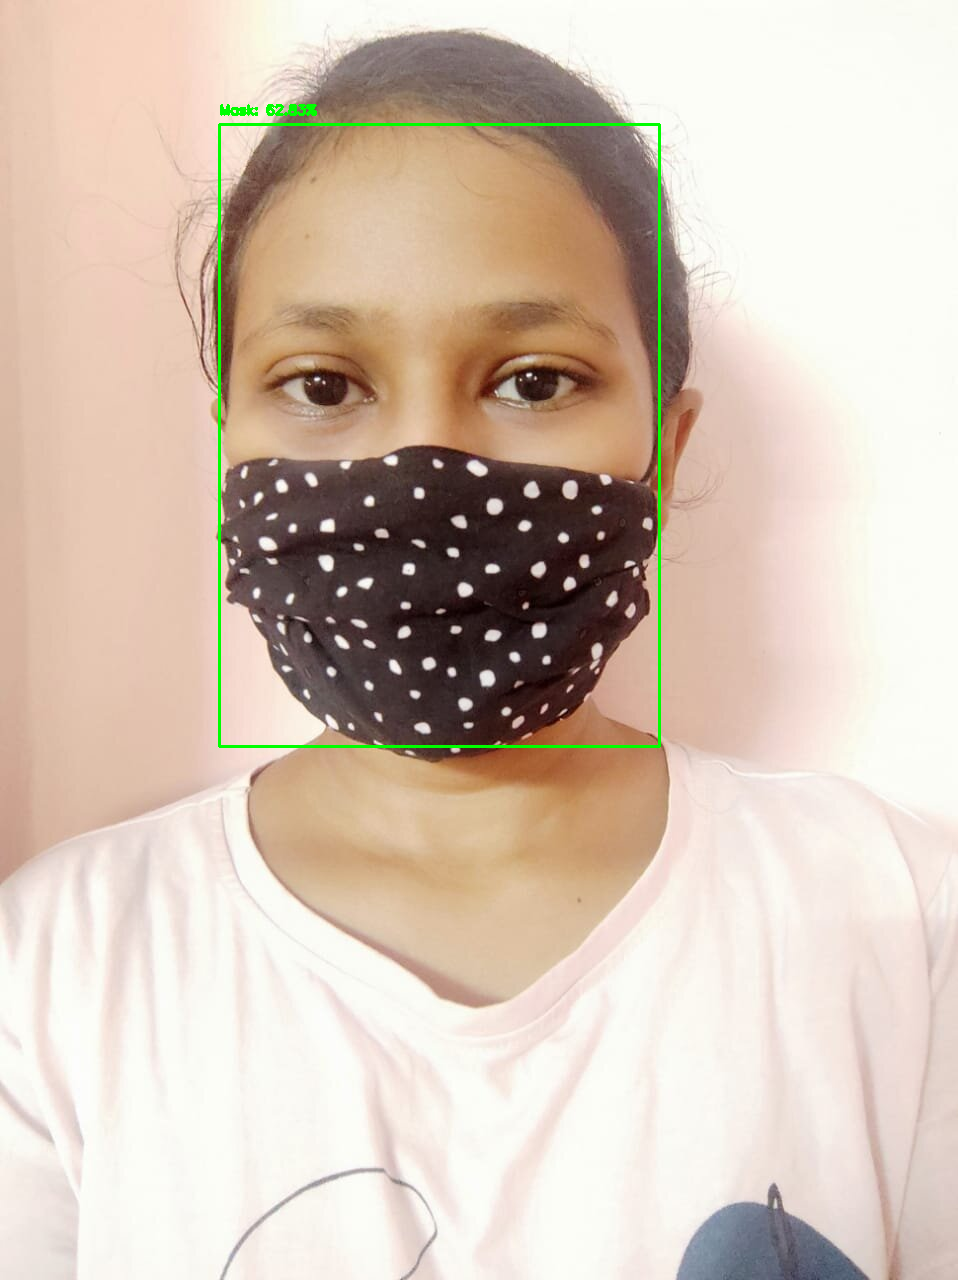

-1

In [ ]:
# loop over the detections
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with	the detection
  confidence = detections[0, 0, i, 2]
  # filter out weak detections by ensuring the confidence is
  # greater than the minimum confidence
  if confidence > args["confidence"]:
    # compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # ensure the bounding boxes fall within the dimensions of
    # the frame
    (startX, startY) = (max(0, startX), max(0, startY))
    (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
    
    # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    # pass the face through the model to determine if the face
    # has a mask or not
    (improperly_masked, mask, withoutMask) = model.predict(face)[0]
    # determine the class label and color we'll use to draw
    # the bounding box and text
    
    #label = "Mask" if mask > withoutMask else "No Mask"
    if mask > withoutMask and mask > improperly_masked:
      label = "Mask"
    elif withoutMask > mask and withoutMask > improperly_masked :
      label = "No mask"
    else:
      label = "Improper mask"

    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
    # include the probability in the label
    label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
    
    # display the label and bounding box rectangle on the output
    # frame
    cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
#print(model.predict(face))

Video


Real Time
